In [12]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import pandas as pd
def parse_gff(gff_file):
    """
    Parse the GFF file to extract information about transposable elements.
    Returns a list of dictionaries, each containing relevant data for one element.
    """
    elements = []
    with open(gff_file, 'r') as f:
        for line in f:
            if line.startswith("#") or not line.strip():
                continue
            fields = line.strip().split("\t")
            if fields[2] != "functional_transposable_element":
                continue
            attributes = {k: v for k, v in [attr.split("=") for attr in fields[8].split(";")]}
            element = {
                "chromosome": fields[0],
                "start": int(fields[3]),
                "end": int(fields[4]),
                "strand": fields[6],
                "tsd1_start": int(attributes["TSD1"].split("-")[0]),
                "tsd1_end": int(attributes["TSD1"].split("-")[1]),
                "tsd1_seq": attributes["TSD1_Sequence"],
                "tir1_start": int(attributes["TIR1"].split("-")[0]),
                "tir1_end": int(attributes["TIR1"].split("-")[1]),
                "tir1_seq": attributes["TIR1_Sequence"],
                "tir2_start": int(attributes["TIR2"].split("-")[0]),
                "tir2_end": int(attributes["TIR2"].split("-")[1]),
                "tir2_seq": attributes["TIR2_Sequence"],
                "tsd2_start": int(attributes["TSD2"].split("-")[0]),
                "tsd2_end": int(attributes["TSD2"].split("-")[1]),
                "tsd2_seq": attributes["TSD2_Sequence"],
                "protein_regions": [
                    tuple(map(int, region.split("-")))
                    for region in attributes.get("Protein_Region_1", "").split(",")
                ]
            }
            elements.append(element)
    return elements


def visualize_transposon(element,save=False):
    """
    Visualize a single transposable element based on parsed GFF information.
    Includes TIR/TSD annotations, protein sequence alignment, start/end labels, and larger fonts.
    """
    fig, ax = plt.subplots(figsize=(15, 5))  # Adjust height for better visibility

    # Extract information from the element
    chromosome = element["chromosome"]
    strand = element["strand"]
    tsd1_start, tsd1_end = element["tsd1_start"], element["tsd1_end"]
    tsd2_start, tsd2_end = element["tsd2_start"], element["tsd2_end"]
    tir1_start, tir1_end = element["tir1_start"], element["tir1_end"]
    tir2_start, tir2_end = element["tir2_start"], element["tir2_end"]
    protein_regions = element["protein_regions"]
    tsd1_seq, tsd2_seq = element["tsd1_seq"], element["tsd2_seq"]
    tir1_seq, tir2_seq = element["tir1_seq"], element["tir2_seq"]
    start, end = element["start"], element["end"]

    # Define layout proportions
    total_width = 1.0
    tsd_width = 0.1
    tir_width = 0.15
    spacer_width = 0.05
    protein_width = 0.4

    # Define region positions
    tsd1_start_pos = 0
    tsd1_end_pos = tsd1_start_pos + tsd_width
    tir1_start_pos = tsd1_end_pos
    tir1_end_pos = tir1_start_pos + tir_width
    spacer1_start_pos = tir1_end_pos
    spacer1_end_pos = spacer1_start_pos + spacer_width
    protein_start_pos = spacer1_end_pos
    protein_end_pos = protein_start_pos + protein_width
    spacer2_start_pos = protein_end_pos
    spacer2_end_pos = spacer2_start_pos + spacer_width
    tir2_start_pos = spacer2_end_pos
    tir2_end_pos = tir2_start_pos + tir_width
    tsd2_start_pos = tir2_end_pos
    tsd2_end_pos = tsd2_start_pos + tsd_width

    # Define colors
    tsd_color = 'red'
    tir_color = 'blue'
    protein_color = 'green'
    spacer_color = 'white'

    # Add regions as rectangles
    ax.add_patch(patches.Rectangle((tsd1_start_pos, 0.5), tsd_width, 0.2, 
                                    facecolor=tsd_color, alpha=0.6, edgecolor='black', lw=1.5))
    ax.add_patch(patches.Rectangle((tir1_start_pos, 0.5), tir_width, 0.2, 
                                    facecolor=tir_color, alpha=0.6, edgecolor='black', lw=1.5))
    ax.add_patch(patches.Rectangle((spacer1_start_pos, 0.5), spacer_width, 0.2, 
                                    facecolor=spacer_color, edgecolor='black', lw=1.0, linestyle='dashed'))
    ax.add_patch(patches.Rectangle((protein_start_pos, 0.5), protein_width, 0.2, 
                                    facecolor=protein_color, alpha=0.4, edgecolor='black', lw=1.5))
    ax.add_patch(patches.Rectangle((spacer2_start_pos, 0.5), spacer_width, 0.2, 
                                    facecolor=spacer_color, edgecolor='black', lw=1.0, linestyle='dashed'))
    ax.add_patch(patches.Rectangle((tir2_start_pos, 0.5), tir_width, 0.2, 
                                    facecolor=tir_color, alpha=0.6, edgecolor='black', lw=1.5))
    ax.add_patch(patches.Rectangle((tsd2_start_pos, 0.5), tsd_width, 0.2, 
                                    facecolor=tsd_color, alpha=0.6, edgecolor='black', lw=1.5))

    # Add TSD/TIR annotations with arrows
    ax.annotate('TSD1', xy=(tsd1_start_pos + tsd_width / 2, 0.7),
                xytext=(tsd1_start_pos + tsd_width / 2, 0.9),
                arrowprops=dict(facecolor='black', arrowstyle='->'), fontsize=14, ha='center')
    ax.annotate('TIR1', xy=(tir1_start_pos + tir_width / 2, 0.7),
                xytext=(tir1_start_pos + tir_width / 2, 0.9),
                arrowprops=dict(facecolor='black', arrowstyle='->'), fontsize=14, ha='center')
    ax.annotate('TIR2', xy=(tir2_start_pos + tir_width / 2, 0.7),
                xytext=(tir2_start_pos + tir_width / 2, 0.9),
                arrowprops=dict(facecolor='black', arrowstyle='->'), fontsize=14, ha='center')
    ax.annotate('TSD2', xy=(tsd2_start_pos + tsd_width / 2, 0.7),
                xytext=(tsd2_start_pos + tsd_width / 2, 0.9),
                arrowprops=dict(facecolor='black', arrowstyle='->'), fontsize=14, ha='center')

    # Add text labels inside rectangles for sequences and positions
    ax.text(tsd1_start_pos + tsd_width / 2, 0.45, f"{tsd1_seq}\n({tsd1_start}-{tsd1_end})", 
            fontsize=12, ha='center', va='center', color='black')
    ax.text(tir1_start_pos + tir_width / 2, 0.45, f"{tir1_seq}\n({tir1_start}-{tir1_end})", 
            fontsize=12, ha='center', va='center', color='black')
    ax.text(tir2_start_pos + tir_width / 2, 0.45, f"{tir2_seq}\n({tir2_start}-{tir2_end})", 
            fontsize=12, ha='center', va='center', color='black')
    ax.text(tsd2_start_pos + tsd_width / 2, 0.45, f"{tsd2_seq}\n({tsd2_start}-{tsd2_end})", 
            fontsize=12, ha='center', va='center', color='black')

    # Add protein sequence and start/end annotations
    protein_text = ", ".join([f"{pr_start}-{pr_end}" for pr_start, pr_end in protein_regions])
    transposase_seq = "ATG...TAA"  # Example sequence
    ax.text(protein_start_pos + protein_width / 2, 0.45, f"Transposase: {transposase_seq}\n({protein_regions[0][0]}-{protein_regions[-1][1]})",
            fontsize=12, ha='center', va='center', color='black')

    # add protein region tranlation direction arrow considering strand
    if strand == "+":
        ax.annotate('', xy=(protein_start_pos, 0.6), xytext=(protein_end_pos, 0.6),
                    arrowprops=dict(facecolor='black', arrowstyle='->'), fontsize=14)
    else:
        ax.annotate('', xy=(protein_end_pos, 0.6), xytext=(protein_start_pos, 0.6),
                    arrowprops=dict(facecolor='black', arrowstyle='->'), fontsize=14)


    # Add title and annotations
    ax.text(0.5, 1.0, f"Chromosome: {chromosome}  |  Range: {start}-{end}  |  Strand: {strand}",
            fontsize=16, ha='center', va='center', color='black')
    ax.axis('off')
    if save:
        plt.savefig(f"{chromosome}_{start}_{end}.png")
    else:
        plt.show()




In [ ]:
# Load GFF and visualize
gff_file = "DTA_transposon_analysis_report.gff"
elements = parse_gff(gff_file)
elements_df = pd.DataFrame(elements)
elements_df

,chromosome,start,end,strand,tsd1_start,tsd1_end,tsd1_seq,tir1_start,tir1_end,tir1_seq,tir2_start,tir2_end,tir2_seq,tsd2_start,tsd2_end,tsd2_seq,protein_regions
0,NC_024468.2,69073676,69078820,+,1196,1204,GATGATGA,1204,1209,CAAGG,3262,3267,GCATG,3267,3275,GATGATGA,"[(1731, 3014)]"
1,NC_024463.2,84291081,84294405,+,139,147,GTATTGTG,147,152,AAAGG,2189,2194,ACTAT,2194,2202,GTATTGTG,"[(439, 1722)]"
2,NC_024464.2,61026473,61031617,+,1196,1204,GATGATGA,1204,1209,CAAGG,3262,3267,GCATG,3267,3275,GATGATGA,"[(1731, 3014)]"
3,NC_024460.2,231528086,231531822,+,319,327,ctcctctc,327,332,tccct,3705,3710,AGTGG,3710,3718,CTCCTCTC,"[(1702, 2285)]"
4,NC_024460.2,56834717,56838041,+,145,153,CCACCACA,153,158,TCCAT,2863,2868,aagga,2868,2876,ccaccaca,"[(481, 1722)]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
240,NC_024462.2,132100361,132103635,-,81,89,GGGAGGAT,89,94,ACTTA,2907,2912,TACTT,2912,2920,GGGAGGAT,"[(3060, 4107)]"
241,NC_024462.2,132100435,132103635,-,7,15,GGGAGGAT,15,20,ACTTA,2833,2838,TACTT,2838,2846,GGGAGGAT,"[(3060, 4107)]"
242,NC_024468.2,90112951,90116126,+,427,435,TGTAAAAA,435,440,AATAG,2104,2109,ctaag,2109,2117,tgtaaaaa,"[(3589, 3695)]"
243,NC_024466.2,113728625,113731825,-,958,966,TGTAATGG,966,971,CAATT,3092,3097,ATTTC,3097,3105,TGTAATGG,"[(2285, 2391)]"


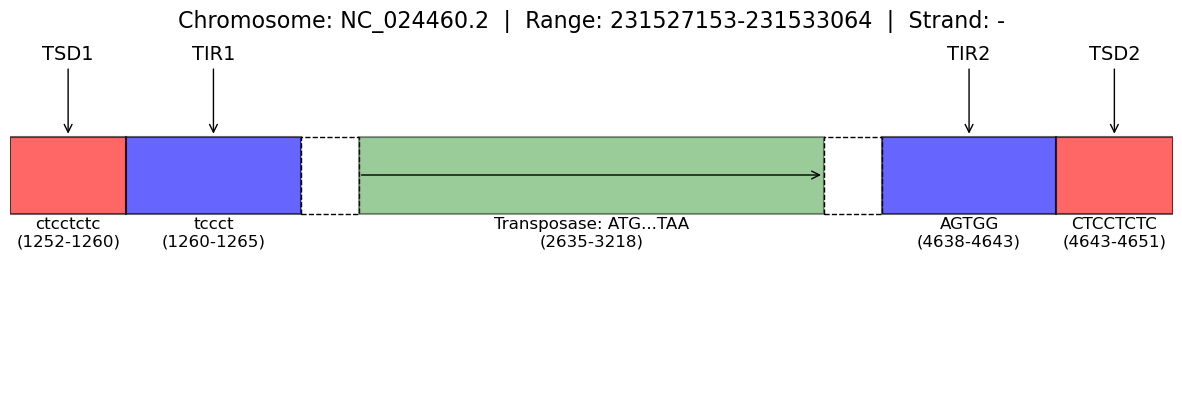

In [13]:
# select the interested element for visualization
visualize_transposon(elements[10])

# if you want to visualize all elements, you can use the following code, but please be aware that it will generate a lot of figures
# for element in elements:
#     visualize_transposon(element,save=True)